In [9]:
import numpy
import matplotlib.pyplot as plt


In [2]:
def vcol(x):
    return x.reshape((x.size, 1))

def vrow(x):
    return x.reshape((1, x.size))

def compute_mu_C(D):
    mu = vcol(D.mean(1))
    C = ((D-mu) @ (D-mu).T) / float(D.shape[1])
    return mu, C

In [3]:
# Compute log-density for a single sample x (column vector). The result is a 1-D array with 1 element
def logpdf_GAU_ND_singleSample(x, mu, C):
    P = numpy.linalg.inv(C)
    return -0.5*x.shape[0]*numpy.log(numpy.pi*2) - 0.5*numpy.linalg.slogdet(C)[1] - 0.5 * ((x-mu).T @ P @ (x-mu)).ravel()

# Compute log-densities for N samples, arranged as a MxN matrix X (N stacked column vectors). The result is a 1-D array with N elements, corresponding to the N log-densities
def logpdf_GAU_ND_slow(X, mu, C):
    ll = [logpdf_GAU_ND_singleSample(X[:, i:i+1], mu, C) for i in range(X.shape[1])]
    return numpy.array(ll).ravel()


# Compute log-densities for N samples, arranged as a MxN matrix X (N stacked column vectors). The result is a 1-D array with N elements, corresponding to the N log-densities
def logpdf_GAU_ND_fast(x, mu, C):
    P = numpy.linalg.inv(C)
    return -0.5*x.shape[0]*numpy.log(numpy.pi*2) - 0.5*numpy.linalg.slogdet(C)[1] - 0.5 * ((x-mu) * (P @ (x-mu))).sum(0)

FileNotFoundError: [Errno 2] No such file or directory: 'llGAU.npy'

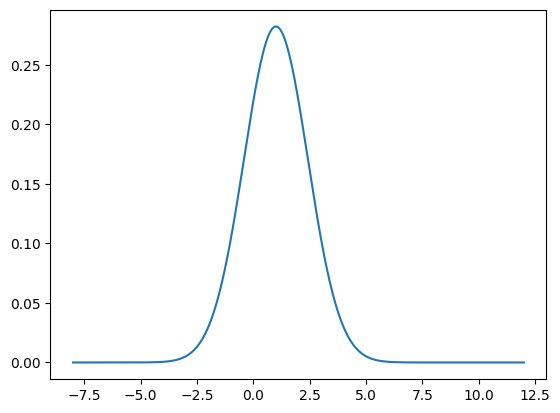

In [10]:
logpdf_GAU_ND = logpdf_GAU_ND_slow

def compute_ll(X, mu, C):
    return logpdf_GAU_ND(X, mu, C).sum()


plt.figure()
XPlot = numpy.linspace(-8, 12, 1000)
m = numpy.ones((1,1)) * 1.0
C = numpy.ones((1,1)) * 2.0
plt.plot(XPlot.ravel(), numpy.exp(logpdf_GAU_ND(vrow(XPlot), m, C)))
#plt.show()




